In [2]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 34.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=cfeb93c6b965f62bf2f94567769dbf871ea4f681ddc199697d87c5868edc48aa
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [1]:
import pyspark
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pyspark.pandas as ps
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('data') \
    .getOrCreate()

In [3]:
df = (spark.read
          .format("csv")
          .option('header', 'true')
          .load("data.csv"))

In [4]:
def show_information_about_data():
   print("data shape : ",df.toPandas().shape)
   print("------------------------------------------------------------")
   print("show example about data: ")
   df.show(5)
   print("------------------------------------------------------------")
   print("data type:")
   print(df.dtypes)
   print("------------------------------------------------------------")

   
show_information_about_data()

data shape :  (15634, 23)
------------------------------------------------------------
show example about data: 
+---------+--------------+------------------+------------------+--------------+--------------+-----------------+-----------------+-------------+---------------------+------------------------+-------------+-----------------+----------------+---------+---------+-------------+------------+------------+------------+-----------+----------+---------+
|  DATEPRD|WELL_BORE_CODE|NPD_WELL_BORE_CODE|NPD_WELL_BORE_NAME|NPD_FIELD_CODE|NPD_FIELD_NAME|NPD_FACILITY_CODE|NPD_FACILITY_NAME|ON_STREAM_HRS|AVG_DOWNHOLE_PRESSURE|AVG_DOWNHOLE_TEMPERATURE|AVG_DP_TUBING|AVG_ANNULUS_PRESS|AVG_CHOKE_SIZE_P|AVG_WHP_P|AVG_WHT_P|DP_CHOKE_SIZE|BORE_OIL_VOL|BORE_GAS_VOL|BORE_WAT_VOL|BORE_WI_VOL| FLOW_KIND|WELL_TYPE|
+---------+--------------+------------------+------------------+--------------+--------------+-----------------+-----------------+-------------+---------------------+------------------------+--

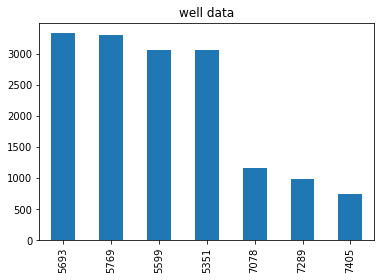

In [5]:
df.toPandas()['NPD_WELL_BORE_CODE'].value_counts().plot(kind='bar',title="well data")

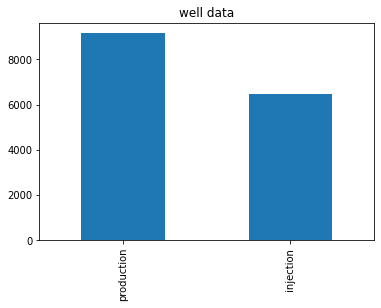

In [6]:
df.toPandas()['FLOW_KIND'].value_counts().plot(kind='bar',title="well data")

In [7]:
pandasdf =  df.toPandas()
pandasdf['NPD_WELL_BORE_CODE'] = pd.to_numeric(pandasdf['NPD_WELL_BORE_CODE'])
pandasdf['BORE_OIL_VOL'] = pd.to_numeric(pandasdf['BORE_OIL_VOL'])
pandasdf['BORE_WI_VOL'] = pd.to_numeric(pandasdf['BORE_WI_VOL'])
pandasdf['ON_STREAM_HRS'] = pd.to_numeric(pandasdf['ON_STREAM_HRS'])
pandasdf['AVG_DOWNHOLE_PRESSURE'] = pd.to_numeric(pandasdf['AVG_DOWNHOLE_PRESSURE'])
pandasdf['AVG_DOWNHOLE_TEMPERATURE'] = pd.to_numeric(pandasdf['AVG_DOWNHOLE_TEMPERATURE'])
pandasdf['AVG_DP_TUBING'] = pd.to_numeric(pandasdf['AVG_DP_TUBING'])
pandasdf['AVG_ANNULUS_PRESS'] = pd.to_numeric(pandasdf['AVG_ANNULUS_PRESS'])
pandasdf['AVG_CHOKE_SIZE_P'] = pd.to_numeric(pandasdf['AVG_CHOKE_SIZE_P'])
pandasdf['AVG_WHP_P'] = pd.to_numeric(pandasdf['AVG_WHP_P'])
pandasdf['AVG_WHT_P'] = pd.to_numeric(pandasdf['AVG_WHT_P'])
pandasdf['DP_CHOKE_SIZE'] = pd.to_numeric(pandasdf['DP_CHOKE_SIZE'])
pandasdf['BORE_OIL_VOL'] = pd.to_numeric(pandasdf['BORE_OIL_VOL'])
pandasdf['BORE_GAS_VOL'] = pd.to_numeric(pandasdf['BORE_GAS_VOL'])
pandasdf['BORE_WAT_VOL'] = pd.to_numeric(pandasdf['BORE_WAT_VOL'])
pandasdf["DATEPRD"] = pd.to_datetime(pandasdf["DATEPRD"])

well1 =pandasdf['NPD_WELL_BORE_CODE'] == 5693
df_well1 = pandasdf[well1]
well2 =pandasdf['NPD_WELL_BORE_CODE'] == 5769
df_well2 = pandasdf[well2]
well3 =pandasdf['NPD_WELL_BORE_CODE'] == 5599
df_well3 = pandasdf[well3]
well4 =pandasdf['NPD_WELL_BORE_CODE'] == 5351
df_well4 = pandasdf[well4]
well5 =pandasdf['NPD_WELL_BORE_CODE'] == 7078
df_well5 = pandasdf[well5]
well6 =pandasdf['NPD_WELL_BORE_CODE'] == 7289
df_well6 = pandasdf[well6]
well7 =pandasdf['NPD_WELL_BORE_CODE'] == 7405
df_well7 = pandasdf[well7]
data = [df_well1['BORE_OIL_VOL'],df_well2['BORE_OIL_VOL'],df_well3['BORE_OIL_VOL'],df_well4['BORE_OIL_VOL'],df_well5['BORE_OIL_VOL'],df_well6['BORE_OIL_VOL'],df_well7['BORE_OIL_VOL']]

In [8]:
df_well3

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
1911,2008-02-12,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,11.50,308.056,...,14.48443,106.806,16.295,92.475,284.65,38888.67,385.0,NaN,production,OP
1912,2008-02-13,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,24.00,303.034,...,22.83299,120.889,53.374,89.620,1869.70,285246.16,7.0,NaN,production,OP
1913,2008-02-14,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,22.50,295.586,...,31.24997,113.718,72.738,80.120,3124.09,509954.88,1.0,NaN,production,OP
1914,2008-02-15,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,23.15,297.663,...,28.51893,116.831,69.996,84.251,2608.28,383426.67,1.0,NaN,production,OP
1915,2008-02-16,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,24.00,295.936,...,30.22790,115.434,71.518,82.359,3051.80,418474.00,5.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,2016-09-13,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,0.00,0.000,...,0.99291,0.000,0.000,0.013,0.00,0.00,0.0,NaN,production,OP
4963,2016-09-14,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,0.00,0.000,...,0.97304,0.000,0.000,0.016,0.00,0.00,0.0,NaN,production,OP
4964,2016-09-15,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,0.00,0.000,...,0.97778,0.000,0.000,0.024,0.00,0.00,0.0,NaN,production,OP
4965,2016-09-16,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,0.00,0.000,...,0.96101,0.000,0.000,0.025,0.00,0.00,0.0,NaN,production,OP


In [9]:
def ecdf(data):

    n = len(data)

    x = np.sort(data)

    y = np.arange(1,n+1)/n
 
    return x,y

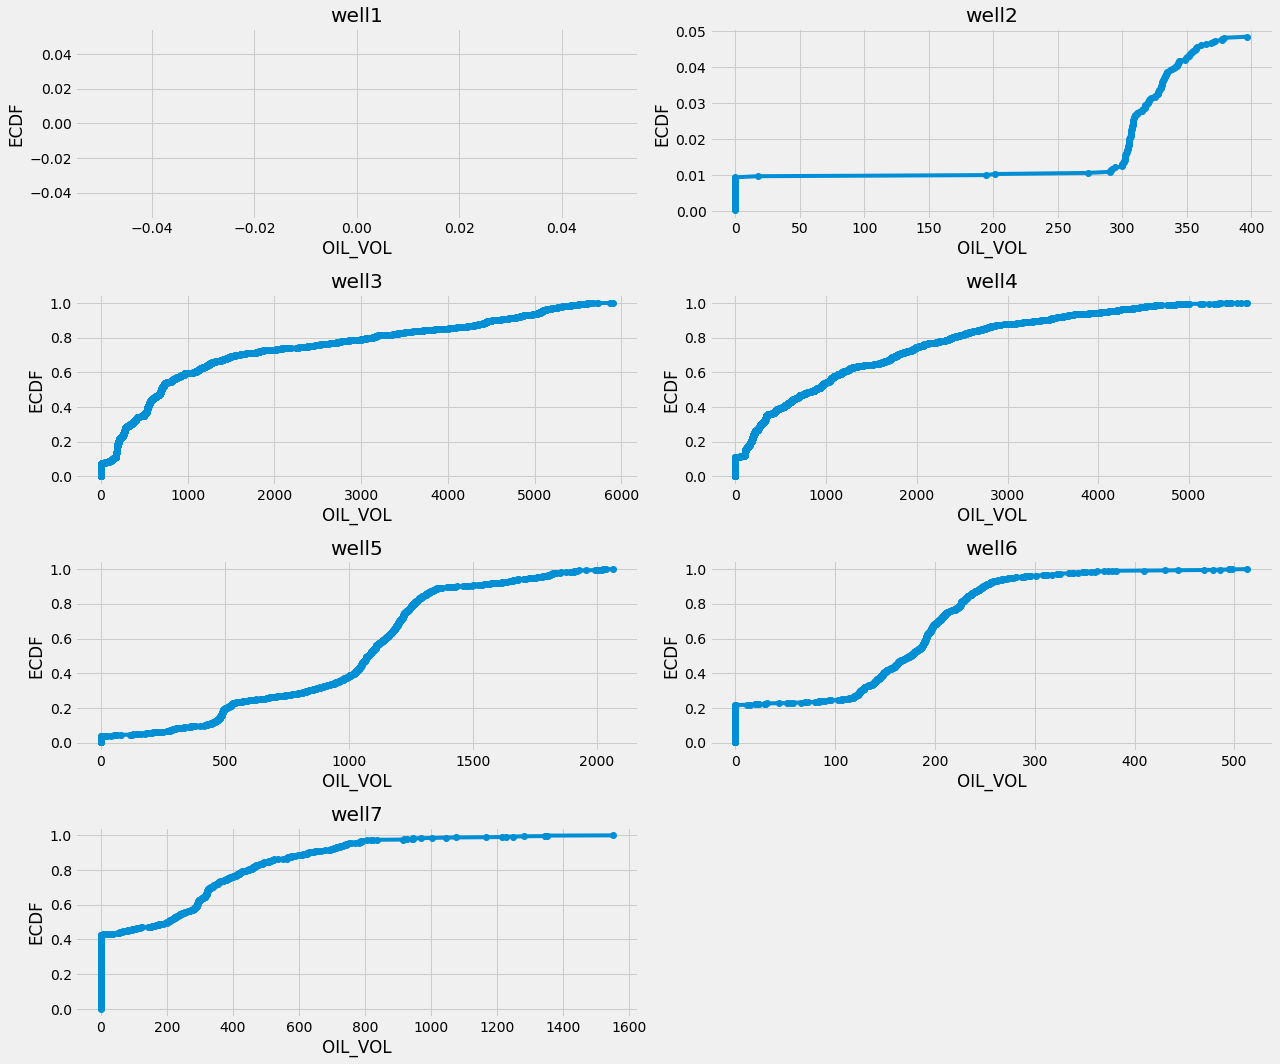

In [10]:

plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
i = 1
for well in data:
  x, y = ecdf(well)
  plt.subplot(4,2,i) 
  plt.plot(x,y,'-o')
  plt.title("well"+str(i))
  plt.xlabel('OIL_VOL')
  plt.ylabel('ECDF')
  i = i+1
plt.tight_layout()

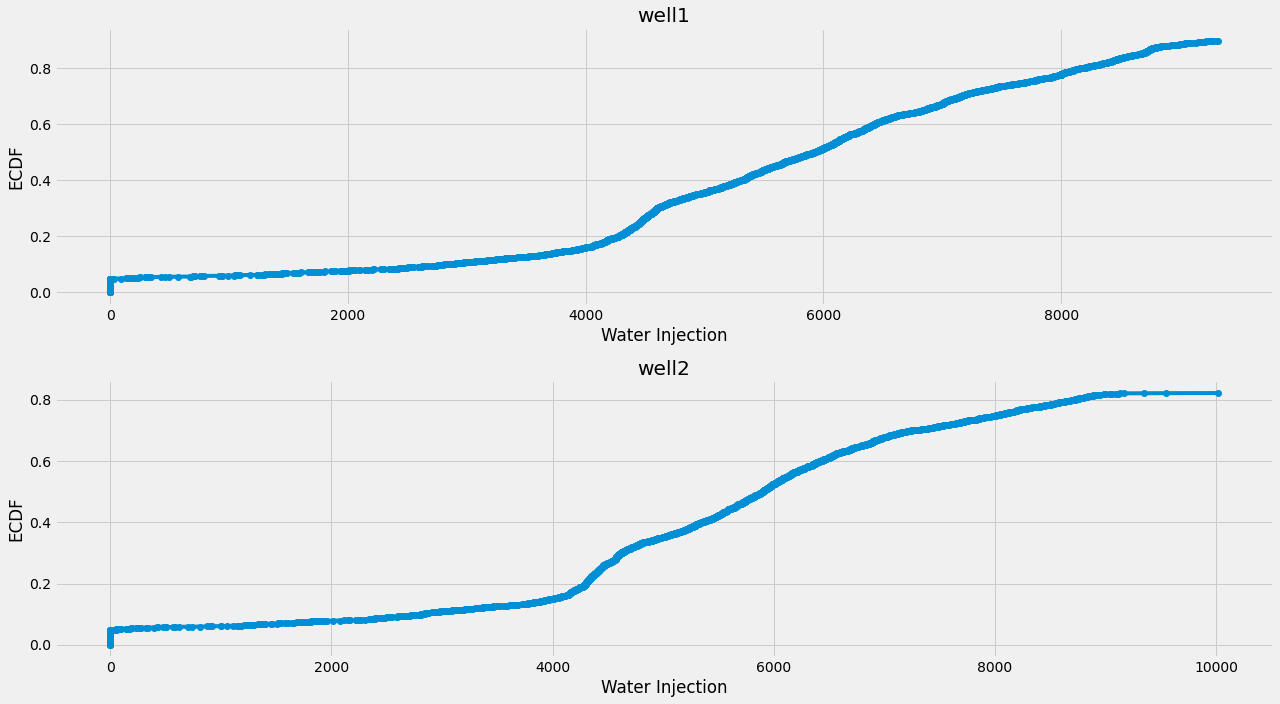

In [11]:

plt.style.use('fivethirtyeight')
data = [df_well1['BORE_WI_VOL'],df_well2['BORE_WI_VOL']]
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
i = 1
for well in data:
  x, y = ecdf(well)
  plt.subplot(2,1,i) 
  plt.plot(x,y,'-o')
  plt.title("well"+str(i))
  plt.xlabel('Water Injection')
  plt.ylabel('ECDF')
  i = i+1
plt.tight_layout()


In [12]:
newdf = pandasdf[(pandasdf.NPD_WELL_BORE_CODE != 5693) & (pandasdf.NPD_WELL_BORE_CODE != 5769)]

In [13]:
newdf['NPD_WELL_BORE_CODE'].value_counts()

5599    3056
5351    3056
7078    1165
7289     978
7405     746
Name: NPD_WELL_BORE_CODE, dtype: int64

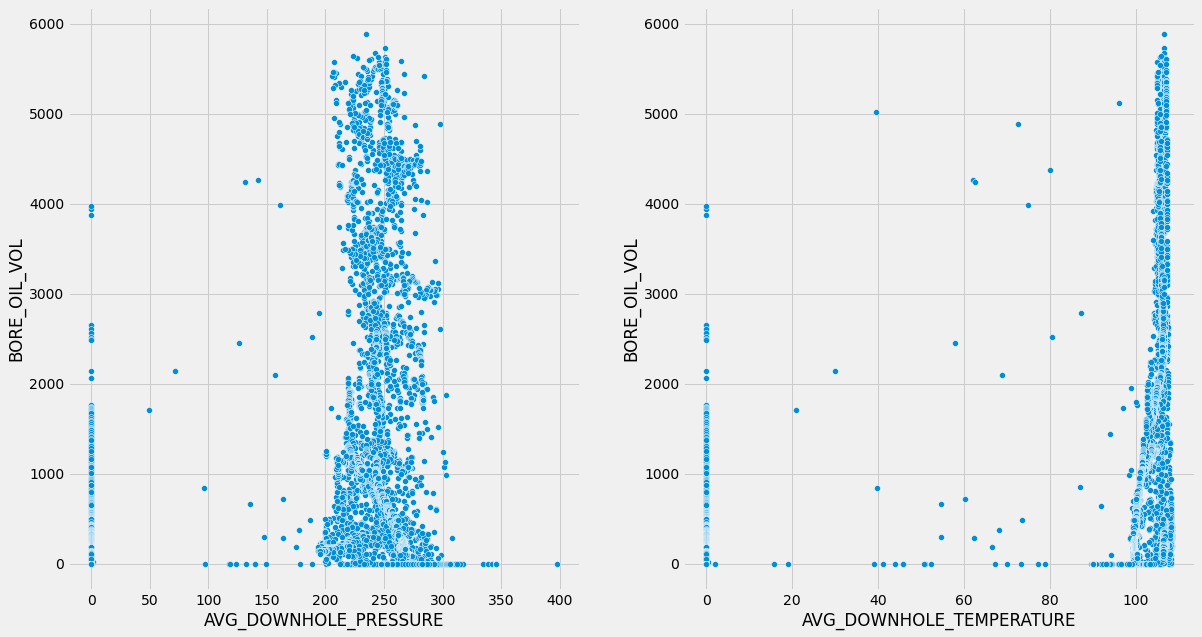

In [14]:
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplot(121)
sns.scatterplot(data=newdf, x=newdf["AVG_DOWNHOLE_PRESSURE"], y=newdf["BORE_OIL_VOL"])
plt.subplot(122)
sns.scatterplot(data=newdf, x=newdf["AVG_DOWNHOLE_TEMPERATURE"], y=newdf["BORE_OIL_VOL"])

In [15]:

newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')
newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')
newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')
newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')
newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')
newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')
newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')
newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')
newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')
newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')
newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')
newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [16]:
newdf = newdf.sort_values(by="DATEPRD")

In [17]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE',
                                          'AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']])

In [18]:
newdf.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
4967,2008-02-12,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M�RSK INSPIRER,0.00,0.000,...,0.009034,0.000000,0.000000,0.059,0.00,0.00,0.0,NaN,production,OP
1911,2008-02-12,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,0.46,308.056,...,0.144844,0.777840,0.174259,92.475,284.65,38888.67,385.0,NaN,production,OP
4968,2008-02-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,M�RSK INSPIRER,0.00,0.000,...,0.009034,0.000000,0.000000,0.068,0.00,0.00,0.0,NaN,production,OP
1912,2008-02-13,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,0.96,303.034,...,0.228330,0.880403,0.570784,89.620,1869.70,285246.16,7.0,NaN,production,OP
1913,2008-02-14,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,M�RSK INSPIRER,0.90,295.586,...,0.312500,0.828178,0.777863,80.120,3124.09,509954.88,1.0,NaN,production,OP


In [19]:
X = pd.DataFrame(columns=['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_DOWNHOLE_PRESSURE','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','NPD_WELL_BORE_CODE'])

In [20]:
X.ON_STREAM_HRS = newdf.ON_STREAM_HRS
X.AVG_DOWNHOLE_TEMPERATURE = newdf.AVG_DOWNHOLE_TEMPERATURE
X.AVG_DOWNHOLE_PRESSURE = newdf.AVG_DOWNHOLE_PRESSURE
X.AVG_CHOKE_SIZE_P = newdf.AVG_CHOKE_SIZE_P
X.AVG_WHP_P = newdf.AVG_WHP_P
X.AVG_WHT_P = newdf.AVG_WHT_P
X.NPD_WELL_BORE_CODE = newdf.NPD_WELL_BORE_CODE
X.DATEPRD = newdf.DATEPRD

In [21]:
y = pd.DataFrame(columns=['BORE_OIL_VOL','NPD_WELL_BORE_CODE'])

In [22]:
y.NPD_WELL_BORE_CODE = newdf.NPD_WELL_BORE_CODE
y.BORE_OIL_VOL = newdf.BORE_OIL_VOL

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=False)

In [24]:
from sklearn.ensemble import RandomForestRegressor


X_train = X_train.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

from sklearn.linear_model import LinearRegression
rf = LinearRegression()
rf.fit(X_train, y_train['BORE_OIL_VOL'])


LinearRegression()

Text(0.5, 1.0, 'Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

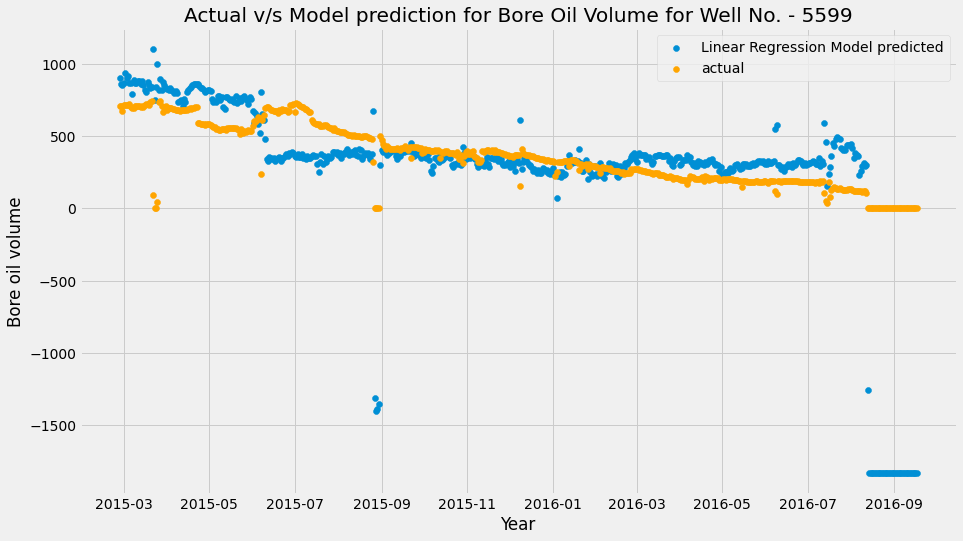

In [26]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = rf.predict(x_test_5599final)
 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')

plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

